<center><h1><font color="RoyalBlue" size=6px>Two-way analysis of variance</font></h1></center>

In [202]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Анализ данных

In [203]:
research_name = 'Gene expression depending on the dosage and age of the subjects'
N = 16
value = 'expr'
a = ['age', 2] # first factor, amount of types
b = ['dose', 2] # second factor, amount of types
df = pd.read_csv('atherosclerosis.csv')

In [204]:
SSB_a = sum([N*a[1]*(i-df['expr'].mean())**2 for i in df.groupby([a[0]]).mean()[value]]) 
SSB_b = sum([N*b[1]*(i-df['expr'].mean())**2 for i in df.groupby(b[0]).mean()[value]]) 
df_a, df_b = a[1] - 1, b[1] - 1

mSSB_a, mSSB_b = SSB_a / df_a, SSB_b / df_b
SSBa, SSBd, df_a, df_b, mSSB_a, mSSB_b 

(197.45275411174634,
 16.9122405933499,
 1,
 1,
 197.45275411174634,
 16.9122405933499)

In [205]:
# counting SSW
SSW = 0
means = df.groupby([a[0], b[0]], as_index=False).mean()
for i in range(means.shape[0]):
    SSW += sum([(j-means.iloc[i][value])**2 for j in df[(df[a[0]] == means.iloc[i][a[0]]) & (df[b[0]] == means.iloc[i][b[0]])][value].array])
DF = df.shape[0] - (a[1]+b[1])
mSSW = SSW / DF
SSW, DF, mSSW

(1590.2574236038338, 60, 26.50429039339723)

In [206]:
F_a = mSSB_a / mSSW 
p_a = st.f.sf(F_a, df_a, DF)
F_a, p_a

(7.449841183483861, 0.008313446093880107)

In [207]:
F_b = mSSB_b / mSSW 
p_b = st.f.sf(F_b, df_b, DF)
F_b, p_b

(0.6380944497032485, 0.4275524367717639)

<b>Оформление таблицы

In [208]:
anova_results = pd.DataFrame([
    {
        'Df': df_a,
        'Sum Sq': SSB_a.round(2),
        'Mean Sq': mSSB_a.round(2),
        'F-value': F_a.round(2),
        'Pr(>F)': p_a.round(4)
    },
    {
        'Df': df_b,
        'Sum Sq': SSB_b.round(2),
        'Mean Sq': mSSB_b.round(2),
        'F-value': F_b.round(2),
        'Pr(>F)': p_b.round(4)
    },
    {
        'Df': DF,
        'Sum Sq': SSW.round(2),
        'Mean Sq': mSSW.round(2),
        'F-value': '',
        'Pr(>F)': ''
    }], index=[a[0], b[0], 'Residuals'])

In [209]:
anova_results

,Df,Sum Sq,Mean Sq,F-value,Pr(>F)
age,1,197.45,197.45,7.45,0.0083
dose,1,16.91,16.91,0.64,0.4276
Residuals,60,1590.26,26.50,,


<b>Построение графиков

Text(0.5, 1.0, 'Gene expression depending on the dosage and age of the subjects')

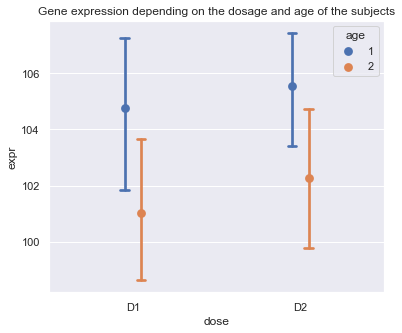

In [219]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(6, 5)})
sns.pointplot(x=b[0], y=value, hue=a[0], data=df, dodge=.1, capsize=.05, linestyles=['', ''])
plt.title(research_name)